In [9]:
import pandas as pd
df = pd.read_csv("../raw_data/Nykaa_Product_Review.csv")
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Id               625 non-null    object 
 1   Product Brand Code       625 non-null    object 
 2   Retailer                 625 non-null    object 
 3   Product Category         544 non-null    object 
 4   Product Brand            625 non-null    object 
 5   Product Name             625 non-null    object 
 6   Product Price            625 non-null    object 
 7   Product Url              610 non-null    object 
 8   Market                   625 non-null    object 
 9   Product Description      625 non-null    object 
 10  Product Currency         625 non-null    object 
 11  Product Image Url        625 non-null    object 
 12  Product Tags             610 non-null    object 
 13  Product Contents         324 non-null    object 
 14  Product Rating           5

(625, 18)

In [10]:
df['Product Price'] = pd.to_numeric(df['Product Price'] , errors = 'coerce' )
df['Product Rating'] = pd.to_numeric(df['Product Rating'] , errors = 'coerce' )

In [11]:
print(df.isnull().sum())

df['Product Category'] = df['Product Category'].fillna('Unknown')
df['Product Url'] = df['Product Url'].fillna('Missing')
df['Product Contents'] = df['Product Contents'].fillna('Not Provided')
df['Product Tags'] = df['Product Tags'].fillna('None')

df['Product Price'] = df['Product Price'].fillna(df['Product Price'].median())
df['Product Rating'] = df['Product Rating'].fillna(df['Product Rating'].median())
df['Product Reviews Count'] = df['Product Reviews Count'].fillna(0)


Product Id                   0
Product Brand Code           0
Retailer                     0
Product Category            81
Product Brand                0
Product Name                 0
Product Price               15
Product Url                 15
Market                       0
Product Description          0
Product Currency             0
Product Image Url            0
Product Tags                15
Product Contents           301
Product Rating              74
Product Reviews Count       62
Expected Category Count      0
Expected Brand Count         0
dtype: int64


In [12]:
print(df.duplicated().sum())
df[df.duplicated(keep=False)]
df = df.drop_duplicates(subset = 'Product Id', keep = 'first')

2


In [13]:
df.describe()

,Product Price,Product Rating,Product Reviews Count,Expected Brand Count
count,573.000000,573.000000,573.000000,573.000000
mean,1017.659686,4.250785,255.099651,128.956370
std,1347.652206,0.474290,830.390958,278.472846
min,25.000000,1.000000,0.000000,0.000000
25%,191.000000,4.100000,2.000000,0.000000
50%,447.000000,4.300000,13.000000,0.000000
75%,1350.000000,4.500000,97.000000,126.000000
max,9500.000000,5.000000,8513.000000,2096.000000


In [14]:
# Top 5 Product Brands
df['Product Brand'].value_counts(ascending = False).head(5)

Product Brand
Inner Sense        18
Himalaya           17
Nykaa Cosmetics    14
Allin Exporters    11
Biotique           10
Name: count, dtype: int64

In [15]:
# Top 5 Product Categories
df['Product Category'].value_counts(ascending = False).head(5)

Product Category
Unknown                                        76
Makeup > Lips > Lipstick                       20
Mom & Baby > Maternity Wear > Maternity Bra    19
nykaa.com                                      15
Makeup > Lips > Liquid Lipstick                14
Name: count, dtype: int64

In [16]:
# Top 5 most expensive products
df.sort_values(by='Product Price',ascending = False).head(5)

,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
405,d4e273031089ea24f7cb6de789833fa3,BZ1000,nykaa.com,Unknown,DIOR,DIOR Miss Dior Absolutely Blooming Eau De Parfum,9500.0,https://www.nykaa.com/c/p/950929?skuId=769055,IN,Miss Dior Absolutely Blooming Eau de Parfum is...,INR,https://images-static.nykaa.com/media/catalog/...,DIOR Miss Dior Absolutely Blooming Eau De Parf...,Not Provided,3.5,2.0,0,0
496,1e2394ad0fa57b3af03f0a112be365fc,BZ1000,nykaa.com,Makeup > Face > BB & CC Cream,Bobbi Brown,Bobbi Brown Extra Illuminating Moisture Balm -...,7900.0,https://www.nykaa.com/c/p/261656?skuId=261653,IN,"What it is: Ready to see healthy, glowing skin...",INR,https://images-static.nykaa.com/media/catalog/...,Bobbi Brown Extra Illuminating Moisture Balm -...,"Water\\Aqua\\Eau, Neopentyl Glycol Diheptanoat...",4.5,13.0,0,0
104,981d9c5fe261bf63a003586e47fd9b68,BZ1000,nykaa.com,Unknown,DIOR,DIOR Miss Dior Blooming Bouquet Eau De Toilette,7700.0,https://www.nykaa.com/c/p/950928?skuId=768781,IN,A bouquet of delicate Peony and Rose brightene...,INR,https://images-static.nykaa.com/media/catalog/...,DIOR Miss Dior Blooming Bouquet Eau De Toilett...,Not Provided,5.0,0.0,0,0
388,f5746b3ca6f4ac7cc2e533789e68ab6b,BZ1000,nykaa.com,Hair > Shop By Hair Type > Straight,CADIVEU,Cadiveu Brasil Cacau Eco Keratin,7000.0,https://www.nykaa.com/c/p/547280?skuId=547278,IN,Cadiveu Professional Brasil Cacau Eco Keratin ...,INR,https://images-static.nykaa.com/media/catalog/...,"Cadiveu Brasil Cacau Eco Keratin, Hair, Hair C...",Key Ingredients: Cocoa Butter: Has oily essent...,5.0,0.0,302,22
18,95468730643c0fdffaa81253771485da,BZ1000,nykaa.com,Hair > Shop By Concern > Dry & Frizzy Hair,CADIVEU,Cadiveu Brasil Cacau Brazilian Thermal Reconst...,7000.0,https://www.nykaa.com/c/p/547274?skuId=547272,IN,Cadiveu Professional Brasil Cacau Brazilian Th...,INR,https://images-static.nykaa.com/media/catalog/...,Cadiveu Brasil Cacau Brazilian Thermal Reconst...,"Water, Propylene Glycol, Cetyl Alcohol, Paraff...",4.3,2.0,1267,22


In [17]:
# Top 5 highest rated products
df.sort_values(by='Product Rating',ascending = False).head(5)

,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
20,c545b5953dd5220a0a448dca87fa543f,BZ1000,nykaa.com,Nykaa Luxe > Fragrance > Perfumes (EDP/EDT),Versace,Versace Eros Pour Femme Eau De Toilette,3273.0,https://www.nykaa.com/c/p/296879?skuId=296876,IN,"SOURCED FROM PARCOS, THE OFFICIAL BRAND PARTNE...",INR,https://images-static.nykaa.com/media/catalog/...,"Versace Eros Pour Femme Edt Natural Spray, Nyk...",Not Provided,5.0,3.0,622,1398
28,7d28fe12edafeaacbf663861d012d5d0,BZ1000,nykaa.com,Fragrance > Women > Perfumes (EDT & EDP),Burberry,Burberry My Burberry Eau De Toilette,3680.0,https://www.nykaa.com/c/p/824853?skuId=770007,IN,Discover the joyful scent that captures the es...,INR,https://images-static.nykaa.com/media/catalog/...,"Burberry My Burberry Eau De Toilette, Nykaa Lu...",Not Provided,5.0,1.0,1398,1398
3,424755c11c78b2b24ff13c675baf5d19,BZ1000,nykaa.com,Health & Wellness > Good for You > Super Food,True Elements,True Elements Sunflower Raw Seeds,175.0,https://www.nykaa.com/c/p/370883?skuId=370881,IN,Sunflower has always been admired for its beau...,INR,https://images-static.nykaa.com/media/catalog/...,"True Elements Sunflower Raw Seeds, Wellness, S...",Raw Sunflower Seeds,5.0,0.0,389,149
23,7c652df00c632ba7e49472640768ce2c,BZ1000,nykaa.com,Men's Store > Shop By Concern > Anti Acne,Red Hunt,Red Hunt Fairness Face Wash For Men,80.0,https://www.nykaa.com/c/p/744661?skuId=744660,IN,Get - Set- Glow It gives you a bright and glow...,INR,https://images-static.nykaa.com/media/catalog/...,"Red Hunt Fairness Face Wash For Men, Natural, ...",Not Provided,5.0,2.0,318,0
597,6c42ec1a5bd5a2ce0eb560dd164897b8,BZ1000,nykaa.com,Nykaa Luxe > Skin > Face > Moisturisers,Kiehl's,Kiehl's Facial Fuel Energizing Moisture Treatm...,3100.0,https://www.nykaa.com/c/p/469589?skuId=469591,IN,"Re-energise and revive the look of fatigued, d...",INR,https://images-static.nykaa.com/media/catalog/...,Kiehl's Facial Fuel Energizing Moisture Treatm...,Key Ingredients: - Chestnut Extract: It is der...,5.0,1.0,322,0


In [18]:
# Top 5 most reviewed products
df.sort_values(by='Product Reviews Count',ascending = False).head(5)

,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
37,fbe59721a5e29ad76fc386eb1e4270ef,BH7372,nykaa.com,Brand > Biotique,Biotique,Biotique Bio Papaya Revitalizing Tan removal S...,49.0,https://www.nykaa.com/c/p/516736?skuId=386427,IN,Description Exfoliates dead skin and unclogs o...,INR,https://images-static.nykaa.com/media/catalog/...,Biotique Bio Papaya Revitalizing Tan removal S...,"Papita (Carica papaya), Kela (Musa sapientum),...",4.4,8513.0,288,0
262,5357445d70d5722066b00be9b96ad43b,BZ1000,nykaa.com,Natural > Shop By Concern > Tan Removal,Nykaa Naturals,Nykaa Naturals Citronella Essential Oil,280.0,https://www.nykaa.com/c/p/348870?skuId=172598,IN,Explore the entire range of Face Oils availabl...,INR,https://images-static.nykaa.com/media/catalog/...,"Nykaa Naturals Citronella Essential Oil, Herba...",Not Provided,4.2,7483.0,734,231
241,1ddc2f3c6550d4e5d58616b5eeb91791,BZ1000,nykaa.com,Unknown,Nykaa Naturals,Nykaa Naturals Eucalyptus Essential Oil,245.0,https://www.nykaa.com/c/p/348870?skuId=228858,IN,You can explore various offers on black friday...,INR,https://images-static.nykaa.com/media/catalog/...,"Nykaa Naturals Eucalyptus Essential Oil , Natu...",Not Provided,4.2,7378.0,0,0
598,bbd6259b76efdfa363fe3983074af4bb,BZ1000,nykaa.com,Makeup > Lips > Liquid Lipstick,SUGAR,SUGAR Smudge Me Not Liquid Lipstick - 20 Cocoa...,499.0,https://www.nykaa.com/c/p/111777?skuId=189982,IN,If you've ever lusted for a &quotone-coat wond...,INR,https://images-static.nykaa.com/media/catalog/...,SUGAR Smudge Me Not Liquid Lipstick - 20 Cocoa...,"Isododecane, Dimethicone & Isododecane & Trime...",4.2,5642.0,497,109
260,9dc53977691e07959cdc4fc5877db3e2,BZ1000,nykaa.com,Skin > Shop By Concern > Skin Dryness,Ponds,Ponds Super Light Gel Oil Free Moisturiser Wit...,149.0,https://www.nykaa.com/c/p/502719?skuId=502717,IN,Explore the entire range of Face Moisturizer &...,INR,https://images-static.nykaa.com/media/catalog/...,Ponds Super Light Gel Oil Free Moisturiser Wit...,"Hyaluronic acid, Vitamin E,",4.5,5425.0,0,75


In [19]:
#average price per brand
avg_price_per_brand =(df.groupby(['Product Brand'])).mean(numeric_only = True).sort_values(['Product Price'],ascending = False).head(5)
print(avg_price_per_brand)

               Product Price  Product Rating  Product Reviews Count  \
Product Brand                                                         
CADIVEU               7000.0            4.65                   1.00   
DIOR                  6150.0            4.45                   0.75   
Gucci                 5400.0            4.65                   0.00   
Dunhill               5100.0            5.00                   1.00   
HERMÃˆS               5050.0            4.90                   4.00   

               Expected Brand Count  
Product Brand                        
CADIVEU                        22.0  
DIOR                           29.5  
Gucci                           0.0  
Dunhill                         8.0  
HERMÃˆS                        49.0  


In [20]:
# average reviews per brand
avg_reviews_per_brand = (df.groupby(['Product Brand'])).mean(numeric_only = True).sort_values(['Product Reviews Count'],ascending = False).head(5)
print(avg_reviews_per_brand)

                Product Price  Product Rating  Product Reviews Count  \
Product Brand                                                          
SUGAR                   499.0            4.20                 5642.0   
Nykaa Naturals          258.4            4.27                 2294.3   
Biotique                 92.0            4.15                 1869.1   
TONYMOLY                119.0            4.35                 1784.5   
Aroma Magic             152.5            4.15                 1767.5   

                Expected Brand Count  
Product Brand                         
SUGAR                          109.0  
Nykaa Naturals                  92.2  
Biotique                       338.6  
TONYMOLY                         0.0  
Aroma Magic                     84.5  


In [21]:
# average rating 
avg_rating_per_brand = (df.groupby(['Product Brand'])).mean(numeric_only = True).sort_values(['Product Rating'],ascending = False).head(10)
print(avg_rating_per_brand)

                 Product Price  Product Rating  Product Reviews Count  \
Product Brand                                                           
Burberry           3346.666667             5.0                    1.0   
Blue Nectar         445.000000             5.0                    2.0   
Dermacol           2149.000000             5.0                    1.0   
Chopard            3150.000000             5.0                    1.0   
Dunhill            5100.000000             5.0                    1.0   
Dr. Sheth's         850.000000             5.0                   14.0   
Kapiva Ayurveda     525.000000             5.0                    1.0   
Floret              758.000000             5.0                    0.0   
KOCOSTAR            378.000000             5.0                    5.0   
Silkberry           360.000000             5.0                    3.0   

                 Expected Brand Count  
Product Brand                          
Burberry                        466.0  
Blu

In [22]:
avg_rating_per_category = (df.groupby(['Product Category'])).mean(numeric_only = True).sort_values(['Product Rating'],ascending = False).head(10)
print(avg_rating_per_category)

avg_reviews_per_category = (df.groupby(['Product Category'])).mean(numeric_only = True).sort_values(['Product Reviews Count'],ascending = False).head(5)
print(avg_reviews_per_category)

avg_price_per_category =(df.groupby(['Product Category'])).mean(numeric_only = True).sort_values(['Product Price'],ascending = False).head(5)
print(avg_price_per_category)

                                                Product Price  Product Rating  \
Product Category                                                                
Hair > Shop By Hair Type > Straight               7000.000000        5.000000   
Health & Wellness > Shop By Concern > Immunity     337.000000        5.000000   
Mom & Baby > Baby Care > Baby Oil                  449.000000        5.000000   
Men's Store > Shop By Concern > Anti Acne          197.500000        5.000000   
Men's Store > Fragrance > Deodorants/Roll-ons      200.000000        5.000000   
Personal Care > Bath & Shower > Soaps              580.000000        5.000000   
Nykaa Luxe > Fragrance > Colognes                 5050.000000        4.900000   
Fragrance > Men > Perfumes (EDT & EDP)            4416.333333        4.866667   
Skin > Cleansers > Face Wash                        91.500000        4.825000   
Nykaa Luxe > Makeup > Face > Bronzer              2125.000000        4.800000   

                           

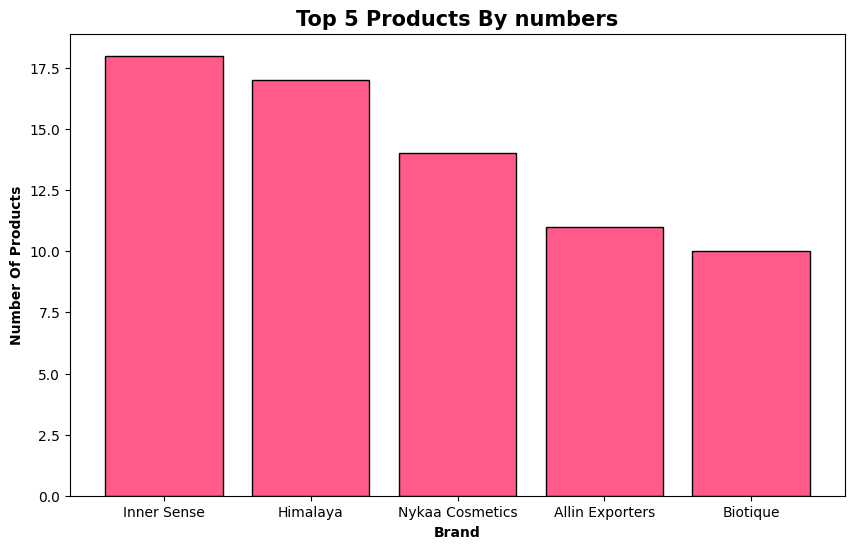

In [23]:
import matplotlib.pyplot as plt
x = (df['Product Brand'].value_counts().head(5).index)
y = (df['Product Brand'].value_counts().head(5).values)
plt.figure(figsize=(10,6))
plt.bar(x,y,color='#ff5a8a', edgecolor='black')
plt.xlabel("Brand",fontsize=10,fontweight='bold')
plt.ylabel("Number Of Products",fontsize=10,fontweight='bold')
plt.title("Top 5 Products By numbers",fontsize=15, fontweight='bold')
plt.show()

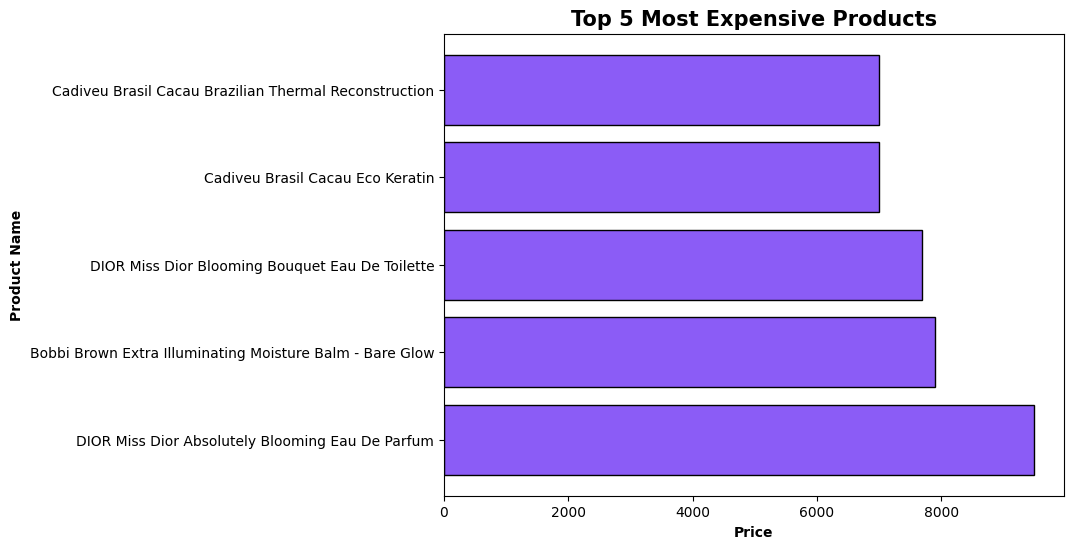

In [24]:
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')

top_5_products = (df.sort_values(by='Product Price',ascending = False).head(5))
x = top_5_products['Product Name']
y = top_5_products['Product Price']
plt.figure(figsize=(8,6))
plt.barh(x,y, color='#8b5cf6', edgecolor='black')
plt.xlabel("Price",fontsize=10,fontweight='bold')
plt.ylabel("Product Name",fontsize=10,fontweight='bold')
plt.title("Top 5 Most Expensive Products",fontsize=15,fontweight='bold')
plt.show()

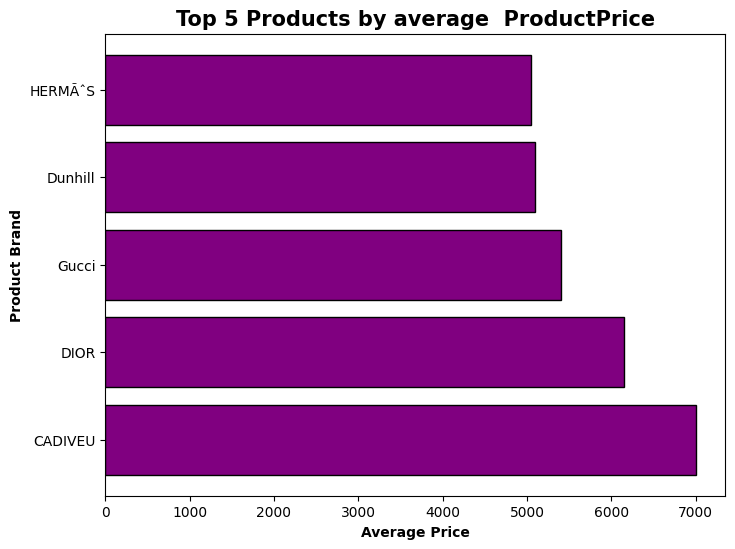

In [25]:
avg_price_per_brand = (df.groupby('Product Brand')
                        .mean(numeric_only=True)
                        .sort_values('Product Price', ascending=False)
                        .head(5))
x = avg_price_per_brand.index
y = avg_price_per_brand['Product Price'] 
plt.figure(figsize=(8,6))
plt.barh(x,y, color='purple', edgecolor='black')
plt.xlabel("Average Price",fontsize=10,fontweight='bold')
plt.ylabel("Product Brand",fontsize=10,fontweight='bold')
plt.title("Top 5 Products by average  ProductPrice",fontsize=15,fontweight='bold')
plt.show()

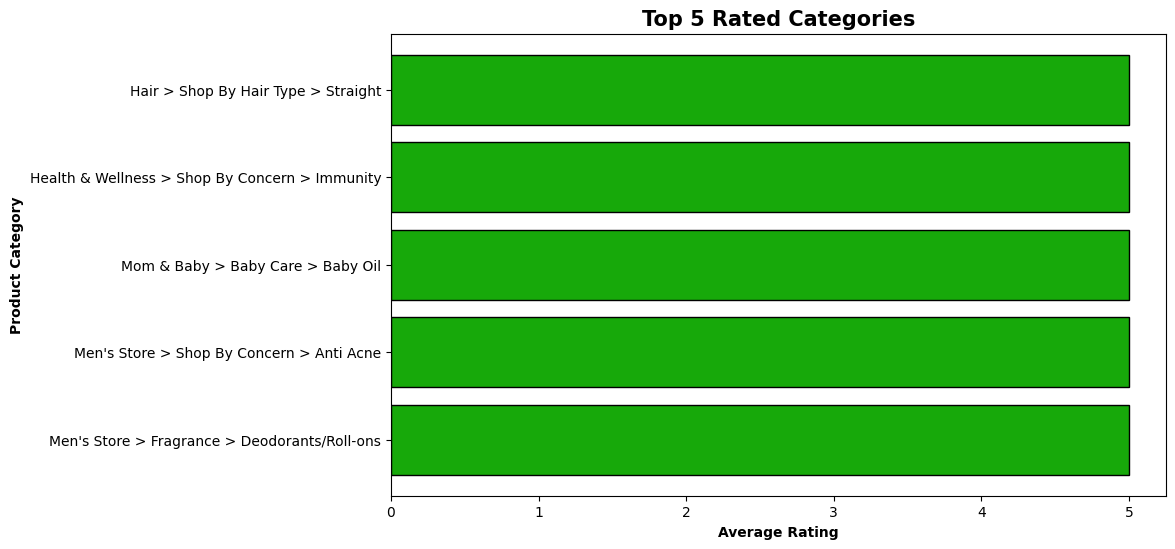

In [26]:
# Top 5 rated categories
avg_rating_per_category = (df.groupby('Product Category')
                           .mean(numeric_only=True)
                           .sort_values('Product Rating', ascending=False)
                           .head(5))

x = avg_rating_per_category.index[::-1]  # reverse for top-to-bottom
y = avg_rating_per_category['Product Rating'][::-1]

plt.figure(figsize=(10,6))
plt.barh(x, y, color='#17a90a', edgecolor='black')
plt.xlabel("Average Rating",fontsize=10,fontweight='bold')
plt.ylabel("Product Category",fontsize=10,fontweight='bold')
plt.title("Top 5 Rated Categories",fontsize=15,fontweight='bold')
plt.show()


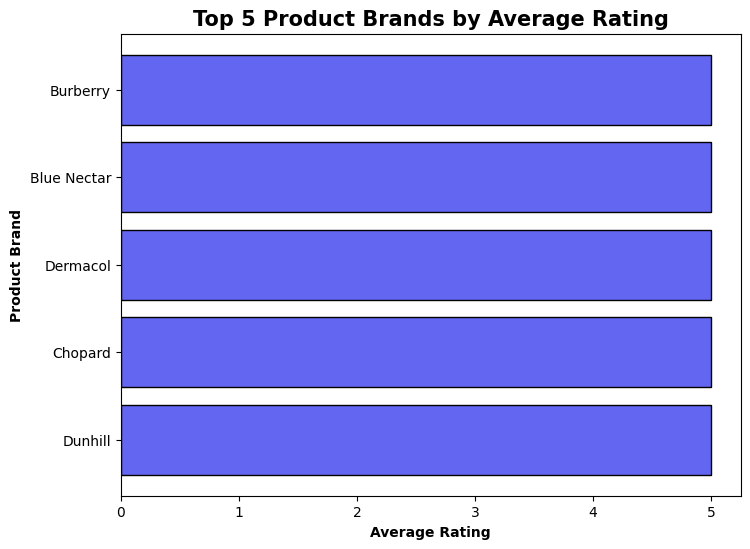

In [27]:
avg_rating_per_brand = (df.groupby('Product Brand')
                        .mean(numeric_only=True)
                        .sort_values('Product Rating', ascending=False)
                        .head(5))

x = avg_rating_per_brand.index[::-1]
y = avg_rating_per_brand['Product Rating'][::-1]

plt.figure(figsize=(8,6))
plt.barh(x, y, color='#6366f1', edgecolor='black')
plt.xlabel("Average Rating",fontsize=10,fontweight='bold')
plt.ylabel("Product Brand",fontsize=10,fontweight='bold')
plt.title("Top 5 Product Brands by Average Rating",fontsize=15,fontweight='bold')
plt.show()


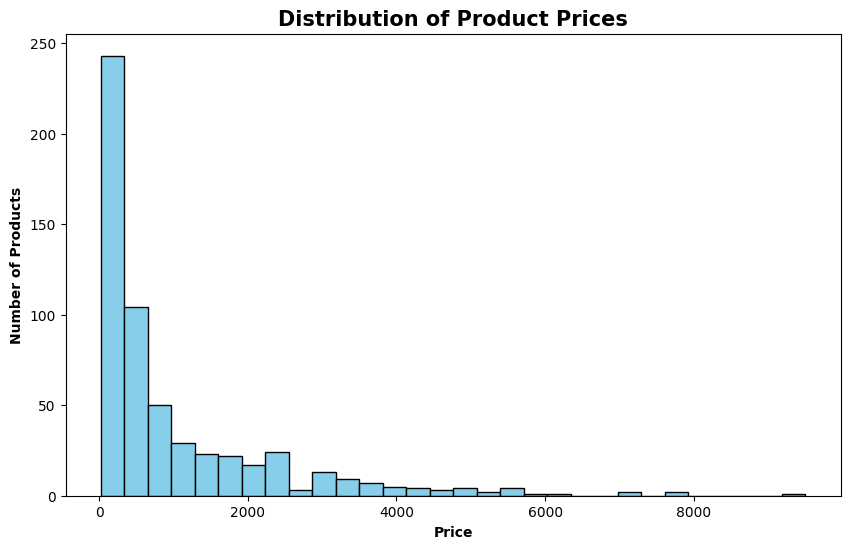

In [28]:
import matplotlib.pyplot as plt

# Price distribution
plt.figure(figsize=(10,6))
plt.hist(df['Product Price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Price",fontsize=10,fontweight='bold')
plt.ylabel("Number of Products",fontsize=10,fontweight='bold')
plt.title("Distribution of Product Prices",fontsize=15,fontweight='bold')
plt.show()

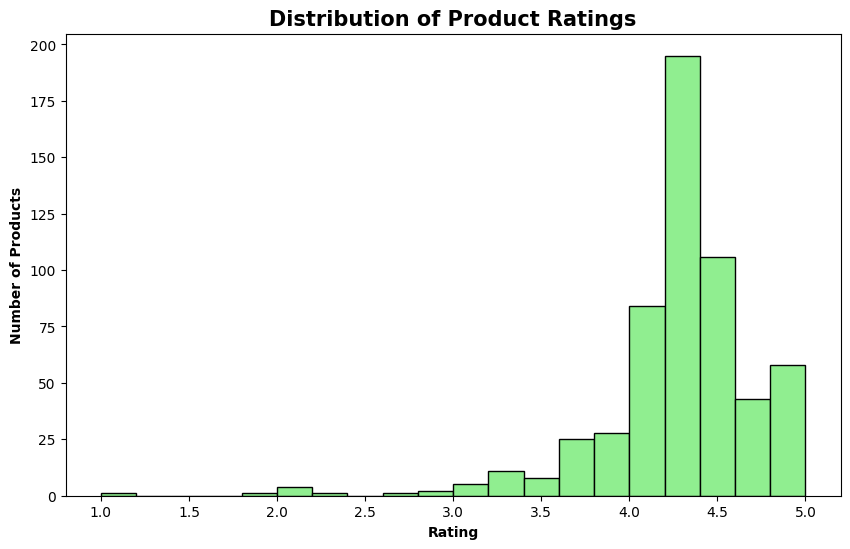

In [29]:
# Rating distribution
plt.figure(figsize=(10,6))
plt.hist(df['Product Rating'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel("Rating",fontsize=10,fontweight='bold')
plt.ylabel("Number of Products",fontsize=10,fontweight='bold')
plt.title("Distribution of Product Ratings",fontsize=15,fontweight='bold')
plt.show()

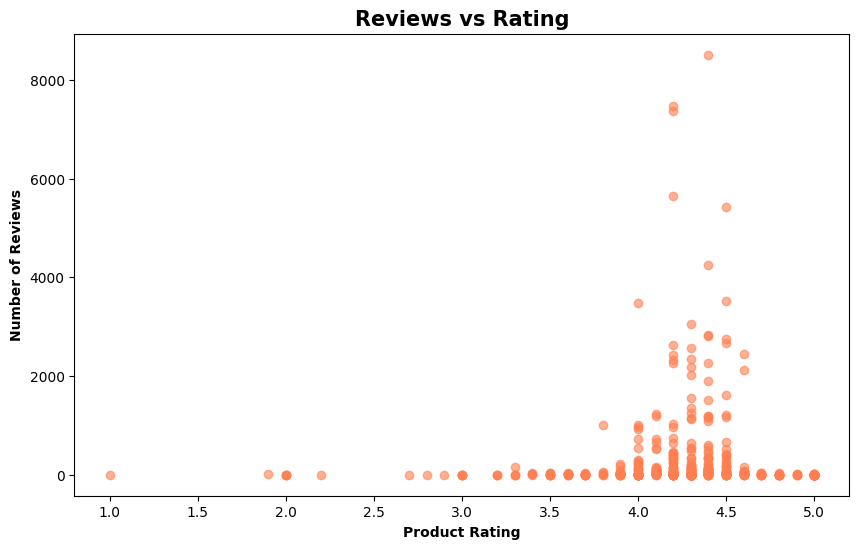

In [30]:
# Reviews vs Rating scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Product Rating'], df['Product Reviews Count'], alpha=0.6, color='coral')
plt.xlabel("Product Rating",fontsize=10,fontweight='bold')
plt.ylabel("Number of Reviews",fontsize=10,fontweight='bold')
plt.title("Reviews vs Rating",fontsize=15,fontweight='bold')
plt.show()

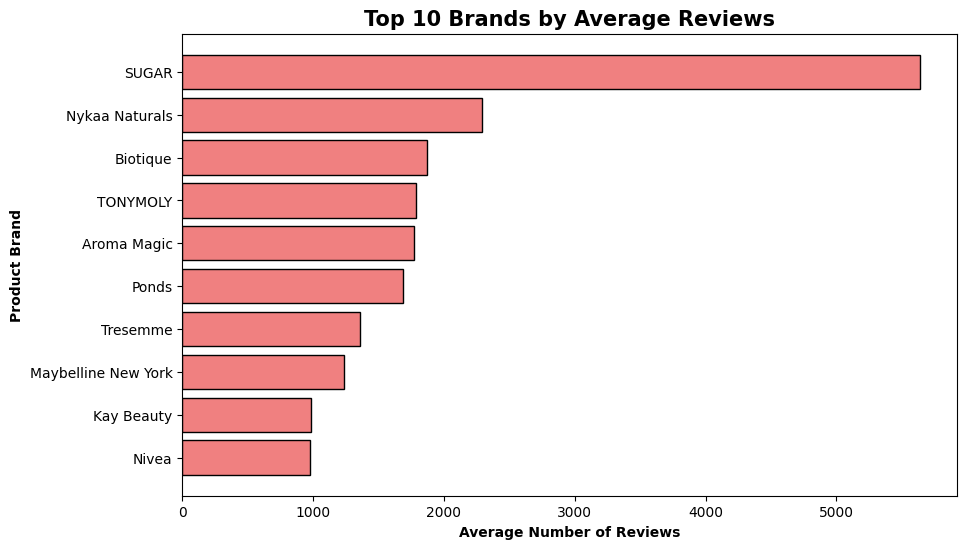

In [31]:
# Brand vs Average Reviews (Top 10)
avg_reviews_per_brand = df.groupby('Product Brand')['Product Reviews Count'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(avg_reviews_per_brand.index[::-1], avg_reviews_per_brand.values[::-1], color='lightcoral',edgecolor='black')
plt.xlabel("Average Number of Reviews",fontsize=10,fontweight='bold')
plt.ylabel("Product Brand",fontsize=10,fontweight='bold')
plt.title("Top 10 Brands by Average Reviews",fontsize=15,fontweight='bold')
plt.show()

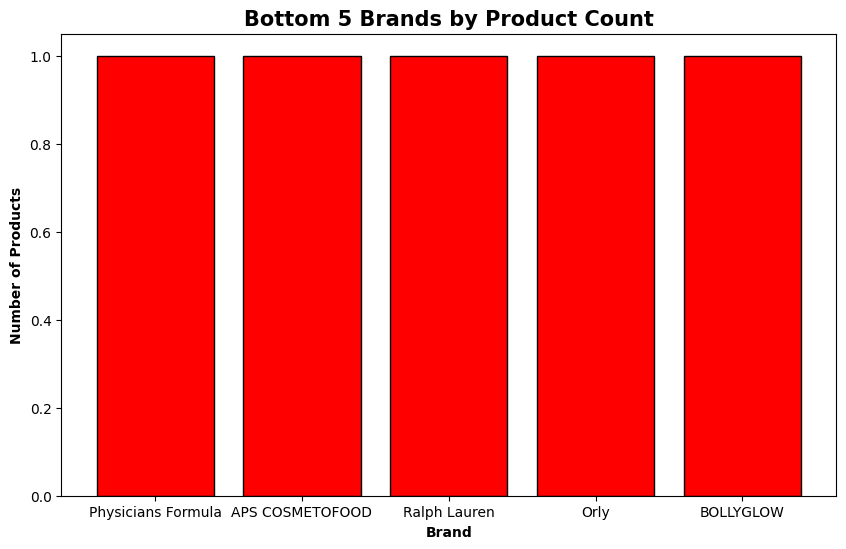

In [32]:


import matplotlib.pyplot as plt

x = (df['Product Brand'].value_counts().tail(5).index)
y = (df['Product Brand'].value_counts().tail(5).values)
plt.figure(figsize=(10,6))
plt.bar(x, y, color='red',edgecolor='black')
plt.xlabel("Brand", fontsize=10, fontweight='bold')
plt.ylabel("Number of Products", fontsize=10, fontweight='bold')
plt.title("Bottom 5 Brands by Product Count", fontsize=15, fontweight='bold')
plt.show()

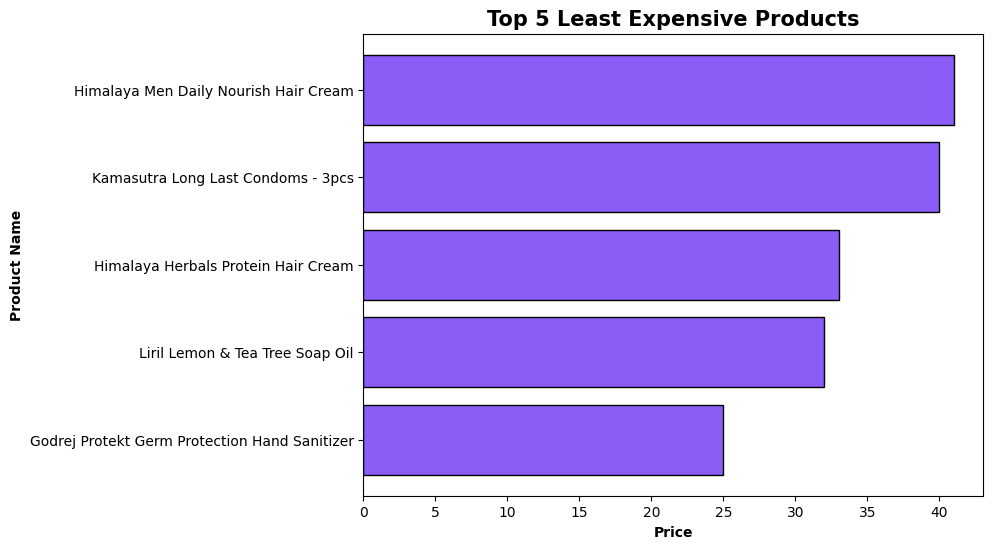

In [33]:
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')

least_5_products = (df.sort_values(by='Product Price',ascending = True).head(5))
x = least_5_products['Product Name']
y = least_5_products['Product Price']
plt.figure(figsize=(8,6))
plt.barh(x,y, color='#8b5cf6', edgecolor='black')
plt.xlabel("Price",fontsize=10,fontweight='bold')
plt.ylabel("Product Name",fontsize=10,fontweight='bold')
plt.title("Top 5 Least Expensive Products",fontsize=15,fontweight='bold')
plt.show()

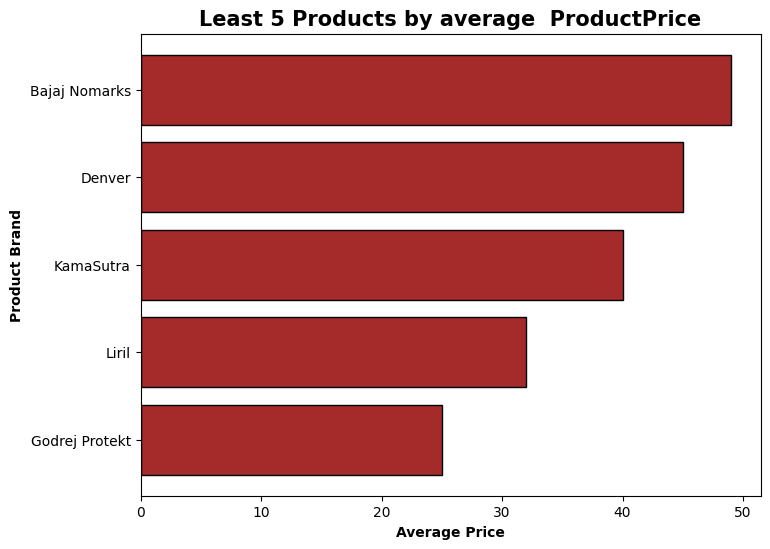

In [34]:
avg_price_per_brand = (df.groupby('Product Brand')
                        .mean(numeric_only=True)
                        .sort_values('Product Price', ascending=True)
                        .head(5))
x = avg_price_per_brand.index
y = avg_price_per_brand['Product Price'] 
plt.figure(figsize=(8,6))
plt.barh(x,y, color='brown', edgecolor='black')
plt.xlabel("Average Price",fontsize=10,fontweight='bold')
plt.ylabel("Product Brand",fontsize=10,fontweight='bold')
plt.title("Least 5 Products by average  ProductPrice",fontsize=15,fontweight='bold')
plt.show()

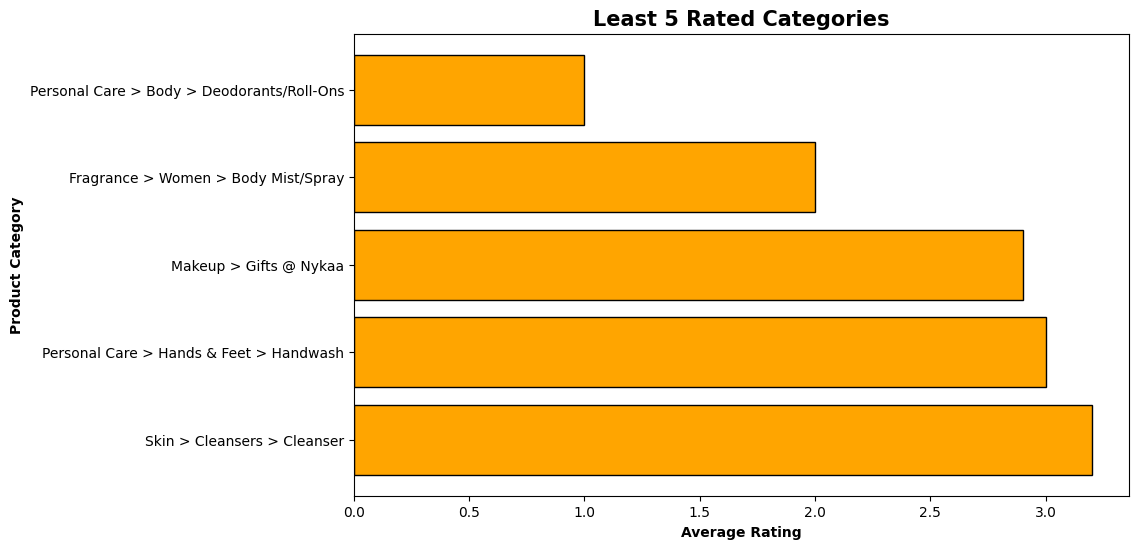

In [35]:
avg_rating_per_category = (df.groupby('Product Category')
                           .mean(numeric_only=True)
                           .sort_values('Product Rating', ascending=True)
                           .head(5))

x = avg_rating_per_category.index[::-1]  # reverse for top-to-bottom
y = avg_rating_per_category['Product Rating'][::-1]

plt.figure(figsize=(10,6))
plt.barh(x, y, color='orange', edgecolor='black')
plt.xlabel("Average Rating",fontsize=10,fontweight='bold')
plt.ylabel("Product Category",fontsize=10,fontweight='bold')
plt.title("Least 5 Rated Categories",fontsize=15,fontweight='bold')
plt.show()

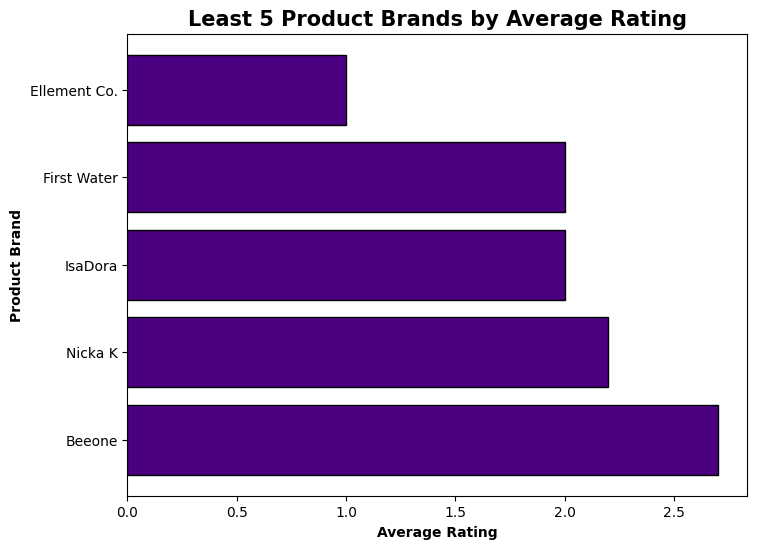

In [36]:
avg_rating_per_brand = (df.groupby('Product Brand')
                        .mean(numeric_only=True)
                        .sort_values('Product Rating', ascending=True)
                        .head(5))

x = avg_rating_per_brand.index[::-1]
y = avg_rating_per_brand['Product Rating'][::-1]

plt.figure(figsize=(8,6))
plt.barh(x, y, color='indigo', edgecolor='black')
plt.xlabel("Average Rating",fontsize=10,fontweight='bold')
plt.ylabel("Product Brand",fontsize=10,fontweight='bold')
plt.title("Least 5 Product Brands by Average Rating",fontsize=15,fontweight='bold')
plt.show()


In [ ]:
df.to_csv(r"../cleaned_data/nykaa_cleaned.csv", index=False)
